# Import Libraries and Data

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('../data/encoded_data.csv')

In [3]:
data.head()

,Age,Gender,Prakriti,Diet,Food Preferences,Meal Timing,Exercise,Sleep Hours/Night,Sleep Quality,Daily Routine,Stress Level,Diabetes Diagnosis,Family History of Diabetes
0,0.063492,0,2,3,475,0,0,0.285714,1,1,0.50,0,1
1,0.285714,0,2,1,705,3,1,0.428571,0,1,0.00,1,1
2,0.126984,0,0,1,242,2,0,0.428571,0,1,0.25,0,0
3,0.317460,1,0,3,643,3,0,0.428571,1,1,0.50,0,0
4,0.714286,1,4,3,705,3,0,0.714286,1,1,0.00,1,1


# Splitting Data into training and testing set

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=data.drop(columns=['Diabetes Diagnosis'])

In [6]:
y=data['Diabetes Diagnosis']

In [7]:
X

,Age,Gender,Prakriti,Diet,Food Preferences,Meal Timing,Exercise,Sleep Hours/Night,Sleep Quality,Daily Routine,Stress Level,Family History of Diabetes
0,0.063492,0,2,3,475,0,0,0.285714,1,1,0.50,1
1,0.285714,0,2,1,705,3,1,0.428571,0,1,0.00,1
2,0.126984,0,0,1,242,2,0,0.428571,0,1,0.25,0
3,0.317460,1,0,3,643,3,0,0.428571,1,1,0.50,0
4,0.714286,1,4,3,705,3,0,0.714286,1,1,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0.523810,0,4,3,701,2,0,0.285714,1,0,0.25,0
3559,0.761905,1,4,3,605,2,1,0.428571,2,0,0.50,1
3560,0.190476,1,1,3,693,1,1,0.428571,1,1,0.25,0
3561,0.809524,1,3,0,705,2,1,0.142857,2,0,0.00,1


In [8]:
y

0       0
1       1
2       0
3       0
4       1
       ..
3558    0
3559    0
3560    0
3561    0
3562    0
Name: Diabetes Diagnosis, Length: 3563, dtype: int64

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Train and Evaluate Multiple Models

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [11]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [12]:
results = []

In [13]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    }
    print(metrics)
    results.append(metrics)

{'Model': 'Logistic Regression', 'Accuracy': 0.6956521739130435, 'Precision': 0.6926406926406926, 'Recall': 0.810126582278481, 'F1 Score': 0.7467911318553092, 'AUC-ROC': np.float64(0.7469787437305947)}
{'Model': 'Random Forest', 'Accuracy': 0.7012622720897616, 'Precision': 0.7156398104265402, 'Recall': 0.7645569620253164, 'F1 Score': 0.7392900856793145, 'AUC-ROC': np.float64(0.7729599554175621)}


C:\Users\Deep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'Model': 'XGBoost', 'Accuracy': 0.7040673211781207, 'Precision': 0.7222222222222222, 'Recall': 0.7569620253164557, 'F1 Score': 0.7391841779975278, 'AUC-ROC': np.float64(0.7637369636175464)}
{'Model': 'Decision Tree', 'Accuracy': 0.635343618513324, 'Precision': 0.6618705035971223, 'Recall': 0.6987341772151898, 'F1 Score': 0.6798029556650246, 'AUC-ROC': np.float64(0.6276689754000477)}
{'Model': 'SVM', 'Accuracy': 0.5539971949509116, 'Precision': 0.5539971949509116, 'Recall': 1.0, 'F1 Score': 0.7129963898916968, 'AUC-ROC': np.float64(0.6278043149430778)}
{'Model': 'Gradient Boosting', 'Accuracy': 0.7194950911640954, 'Precision': 0.7315914489311164, 'Recall': 0.779746835443038, 'F1 Score': 0.7549019607843137, 'AUC-ROC': np.float64(0.7894753602420189)}
{'Model': 'KNN', 'Accuracy': 0.5904628330995793, 'Precision': 0.6061855670103092, 'Recall': 0.7443037974683544, 'F1 Score': 0.6681818181818182, 'AUC-ROC': np.float64(0.589980893240984)}
{'Model': 'Naive Bayes', 'Accuracy': 0.6844319775596073

In [14]:
results_df = pd.DataFrame(results)

In [15]:
results_df.to_csv('../data/model_performance.csv', index=False)

# Visualizing The results

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [22]:
# Metrics for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

In [23]:
# Transpose the DataFrame for easier plotting
results_df_transposed = results_df.set_index('Model')[metrics].transpose()

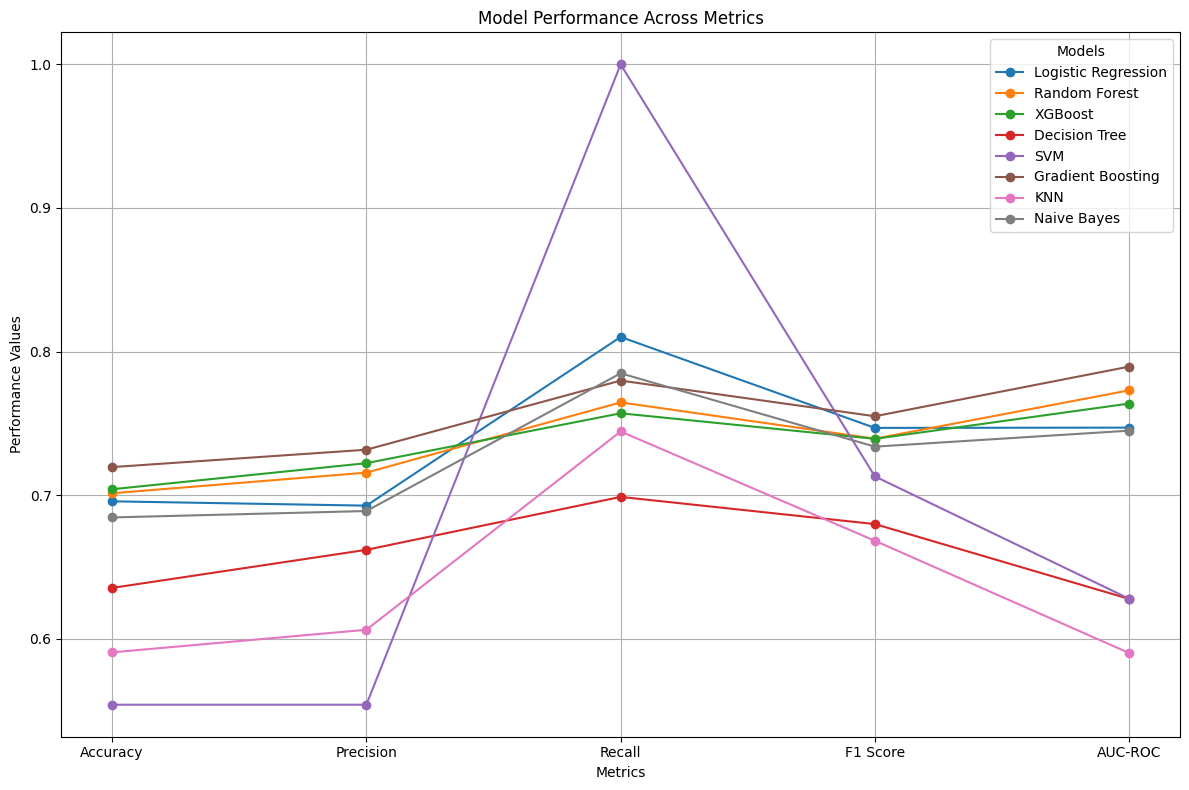

In [25]:
# Plot each model as a line
plt.figure(figsize=(12, 8))
for model in results_df_transposed.columns:
    plt.plot(metrics, results_df_transposed[model], marker='o', label=model)

# Chart details
plt.title('Model Performance Across Metrics')
plt.xlabel('Metrics')
plt.ylabel('Performance Values')
plt.legend(title="Models", loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/model_performance.png')
plt.show()